# Data Collection and Signal Processing

## Getting in Data - Analog to Digital Converters

Many of the biological signals we record in neuroscience (LFPs, EEG, calcium imaging, etc.) are continuous analog signals.

In order to analyze such processes with a computer, it is necessary to convert the process into a series of discrete numbers by digitizing it.

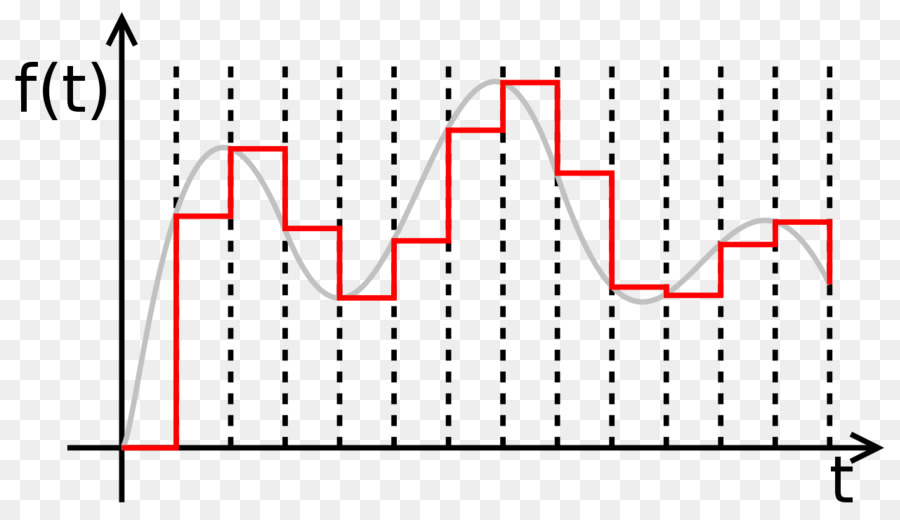

### This procedure consists of two parts: sampling and quantization.

The first part, **sampling**, defines the points at which the data are observed.

The second part, **quantization**, deals with the procedure of converting the analog signal (e.g. voltage, force, etc.) into digital form.

# Sampling

https://en.wikipedia.org/wiki/Sampling_(signal_processing)

It is important to select an appropriate sampling rate. The signal must be sampled often enough to describe the high frequency information in the signal.

The **Shannon-Nyquist** sampling theorem provides a means of determining an appropriate sampling rate.This theorem states that in order to adequately describe a signal it must be sampled at a frequency that is at least twice that of its highest frequency component.

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

# Analog signal (NOT ACTUALLY)
time = np.linspace(0, 1, 100000)
freq = 10
amplitude = np.sin(2*np.pi*time*freq)

# Sampled data points
time2 = np.linspace(0, 1, 100) # Change sampling rate
freq2 = 10
amplitude2 = np.sin(2*np.pi*time2*freq2)

plt.plot(time,amplitude, color = 'b')
plt.plot(time2,amplitude2, color='r')
plt.show()

When you under-sample (violate Nyquist), high-frequency components appear as artificial low-frequency signals - this is called **aliasing**. 

Use a sampling rate of 12 to see an example of aliasing^^^

# Quantization

https://en.wikipedia.org/wiki/Quantization_(signal_processing)

Quantization replaces each real number with an approximation from a finite set of discrete values. Most commonly, these discrete values are represented as fixed-point words. Though any number of quantization levels is possible, common word-lengths are:
-  **8-bit** (256 levels)
- **16-bit** (65,536 levels)
-  **24-bit** (16.8 million levels)

Lets look at a example with a 2-bit quantization level (4 levels)

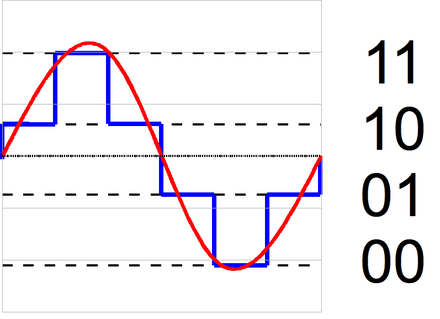

Lets look at a example with a 3-bit quantization level (8 levels)

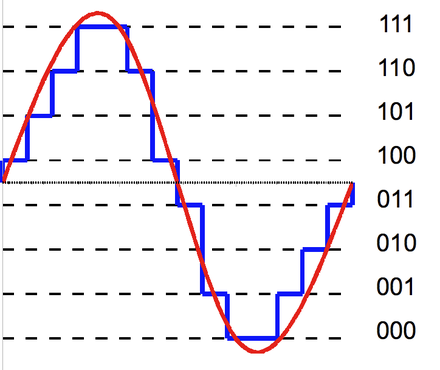

### Quantization Error (Quantization Noise)
Each real value gets rounded to the nearest quantization level, introducing an error of up to ±0.5 LSB (Least Significant Bit). 

Now lets play with a practice example:

In [ ]:
# Example of how finite bits create discrete steps
time = np.linspace(0, 1, 100000)
freq = 10
max1 = 10
min1 = -10
amplitude = 10*np.sin(2*np.pi*time*freq)
bits = 3 # Define quantization level

# Calc step size
change1 = (max1-min1)/(2**bits)  # 20V / 8 = 2.5V per step
print(f"Step size: {change1}")

# Quantize: divide by step size, round, multiply back
quantized = change1 * np.round(amplitude/change1)

plt.figure(figsize=(8, 4), dpi=100)
# plt.hlines(y=np.arange(min1+change1/2, max1, change1), xmin=0, xmax=1, color='k', linestyles='dashed')
plt.plot(time, amplitude)
plt.plot(time, quantized, 'r')
plt.show()

# Data Types

**Integers and floats** - Integers and floats are two different kinds of numerical data. An integer (more commonly called an int) is a number without a decimal point. A float is a floating-point number, which means it is a number that has a decimal place. Floats are used when more precision is needed.

**Integer:** Positive or negative whole numbers (without a fractional part)

In [ ]:
#in python an int can be cast using the int() function
number = 4.0
int_number = int(number)
print(number)
print(int_number)


    Type      Capacity

   Int16 -- (-32,768 to +32,767)

   Int32 -- (-2,147,483,648 to +2,147,483,647)

   Int64 -- (-9,223,372,036,854,775,808 to +9,223,372,036,854,775,807)

**Float:** Any real number with a floating point representation in which a fractional component is denoted by a decimal symbol or scientific notation

In [ ]:
#in python an int can be cast using the float() function
number = 4.0
int_number = int(number)
float_number = float(number)
print(int_number)
print(float_number)

**Complex number:** A number with a real and imaginary component represented as x+yj. x and y are floats and j is -1(square root of -1 called an imaginary number)

In [ ]:
# Python code to demonstrate the working of 
# complex(), real() and imag() 
  
# importing "cmath" for complex number operations 
import cmath 
  
# Initializing real numbers 
x = 5
y = 3
  
# converting x and y into complex number 
z = complex(x,y); 
print(z)
  
# printing real and imaginary part of complex number 
print ("The real part of complex number is : ",end="") 
print (z.real) 
  
print ("The imaginary part of complex number is : ",end="") 
print (z.imag)


# Time and Frequency Domain

https://en.wikipedia.org/wiki/Frequency_domain

The Fourier transform (FT) decomposes a function of time (a signal) into its constituent frequencies

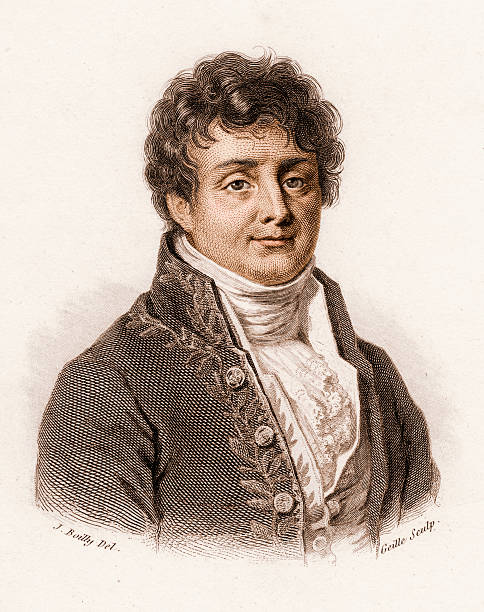

Time and frequency are two complementary views of the same signal.

**Time domain** - shows how signals change moment-to-moment

**Frequency domain** - reveals the amplitude of each underlying rhythmic component

In [ ]:
#Time Domain
f_s = 100 # sampling frequency
time = np.linspace(0, 1, f_s)
freq = 10
amplitude = np.sin(2*np.pi*time*freq)
plt.plot(time,amplitude)
plt.show()

In [ ]:
#Frequency Domain
from scipy import fftpack
len1 = len(amplitude)
print(len1)
X = fftpack.fft(amplitude)
freqs = fftpack.fftfreq(len1) * f_s # These are the frequencies that will be tested
print(freqs[0:int(len1/2)]) # Only want to sample the frequencies within the Nyquist limit

plt.plot(freqs[0:int(len1/2)], 2*np.abs(X)[0:int(len1/2)])
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain (Spectrum) Magnitude')
# plt.xlim(0, f_s/4)
# plt.xlim(0, f_s/2)
plt.show()

Lets try another example

In [ ]:
#Time Domain
fig, axs = plt.subplots(3, 1)
f_s = 100
time = np.linspace(0, 1, f_s)
freq1 = 10
amplitude1 = np.sin(2*np.pi*time*freq1)
freq2 = 34
amplitude2 = np.sin(2*np.pi*time*freq2)

axs[0].plot(time,amplitude1)
axs[1].plot(time,amplitude2)
axs[2].plot(time,amplitude2+amplitude1)

axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[2].set_xlim(0,1)

plt.tight_layout()
plt.show()

In [ ]:
#Frequency Domain
from scipy import fftpack
len1 = len(amplitude1)
X = fftpack.fft(amplitude1+amplitude2)
freqs = fftpack.fftfreq(len1) * f_s
# print(freqs[0:int(len1/2)])

plt.plot(freqs[0:int(len1/2)], 2*np.abs(X)[0:int(len1/2)])
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain (Spectrum) Magnitude')
#plt.xlim(0, f_s/4)
plt.xlim(0, f_s/2)
plt.show()

# Note how frequencies closer to the Nyquist limit are broader peaks.

**How it works conceptually:**
    
The Fourier transform systematically tests every possible frequency to see how much of that frequency is present in your signal.

For each frequency you want to test, the FFT:
1.	Generates a sine wave at that test frequency
2.	Multiplies it point-by-point with your signal
3.	Sums up all those products
4.	The sum tells you how much of that frequency is present


In [ ]:
# Your signal: 10 Hz sine wave
f_s = 1000
time = np.linspace(0, 1, f_s)
signal = np.sin(2*np.pi*10*time)

# Test frequency 1: 10 Hz (MATCHES the signal)
test_10Hz = np.sin(2*np.pi*10*time)
product_10 = signal * test_10Hz

# Test frequency 2: 25 Hz (DOESN'T match)
test_25Hz = np.sin(2*np.pi*25*time)
product_25 = signal * test_25Hz

# Plot
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Left column: Testing 10 Hz
axes[0,0].plot(time[:100], signal[:100])
axes[0,0].set_title('Original Signal (10 Hz)')

axes[1,0].plot(time[:100], test_10Hz[:100], 'orange')
axes[1,0].set_title('Test: 10 Hz sine wave')

axes[2,0].plot(time[:100], product_10[:100], 'green')
axes[2,0].set_title(f'Product (sum = {np.sum(product_10):.1f})')
axes[2,0].axhline(y=0, color='k', linestyle=':', linewidth=0.5)

# Right column: Testing 25 Hz
axes[0,1].plot(time[:100], signal[:100])
axes[0,1].set_title('Original Signal (10 Hz)')

axes[1,1].plot(time[:100], test_25Hz[:100], 'orange')
axes[1,1].set_title('Test: 25 Hz sine wave')

axes[2,1].plot(time[:100], product_25[:100], 'green')
axes[2,1].set_title(f'Product (sum = {np.sum(product_25):.1f})')
axes[2,1].axhline(y=0, color='k', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()

print(f"Sum when testing 10 Hz: {np.sum(product_10):.1f}")
print(f"Sum when testing 25 Hz: {np.sum(product_25):.1f}")

Left side (testing 10 Hz):
- Signal and test wave are synchronized (same frequency)
- When signal is positive, test is positive --> product is positive
- When signal is negative, test is negative --> product is positive
- All products are positive --> large sum 

Right side (testing 25 Hz):
- Signal and test wave are out of sync (different frequencies)
- Sometimes both positive --> positive product
- Sometimes opposite signs --> negative product
- Positives and negatives cancel -> Sum near zero


In [ ]:
# Example showing the decomposition of a signal with multiple frequencies (used earlier)
# Your signal: 10 Hz sine wave
f_s = 100
time = np.linspace(0, 1, f_s)
signal = amplitude2+amplitude1

# Test frequency 1: 10 Hz (MATCHES the signal)
test_10Hz = np.sin(2*np.pi*10*time)
product_10 = signal * test_10Hz

# Test frequency 2: 34 Hz (DOESN'T match)
test_34Hz = np.sin(2*np.pi*34*time)
product_34 = signal * test_34Hz

# Plot
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Left column: Testing 10 Hz
axes[0,0].plot(time[:100], signal[:100])
axes[0,0].set_title('Original Signal (10 Hz + 34 Hz)')

axes[1,0].plot(time[:100], test_10Hz[:100], 'orange')
axes[1,0].set_title('Test: 10 Hz sine wave')

axes[2,0].plot(time[:100], product_10[:100], 'green')
axes[2,0].set_title(f'Product (sum = {np.sum(product_10):.1f})')
axes[2,0].axhline(y=0, color='k', linestyle=':', linewidth=0.5)

# Right column: Testing 34 Hz
axes[0,1].plot(time[:100], signal[:100])
axes[0,1].set_title('Original Signal (10 Hz + 34 Hz)')

axes[1,1].plot(time[:100], test_34Hz[:100], 'orange')
axes[1,1].set_title('Test: 34 Hz sine wave')

axes[2,1].plot(time[:100], product_34[:100], 'green')
axes[2,1].set_title(f'Product (sum = {np.sum(product_34):.1f})')
axes[2,1].axhline(y=0, color='k', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()

print(f"Sum when testing 10 Hz: {np.sum(product_10):.1f}")
print(f"Sum when testing 34 Hz: {np.sum(product_34):.1f}")

In [ ]:
# The example above is a generalization of how FFT works
# This example calculates the actual frequency domain magnitude
f_s = 100
time = np.linspace(0, 1, f_s)
amplitude1 = np.sin(2*np.pi*time*10)
amplitude2 = np.sin(2*np.pi*time*34)
signal = amplitude1 + amplitude2

X = fftpack.fft(signal)
freqs = fftpack.fftfreq(len(signal)) * f_s

print(f"FFT magnitude at 10 Hz: {2*np.abs(X[10]):.1f}")
print(f"FFT magnitude at 34 Hz: {2*np.abs(X[34]):.1f}")

# Noise and Corruption

https://en.wikipedia.org/wiki/Noise_(signal_processing)

Noise is any unwanted signal recorded at the same time as a signal of interest. There are many common types of noise:

**Extraneous Noise** - arises when more than one signal is transduced by a recording device. Often the distinction between noise and signal will depend upon the particular application. 

**Power Noise or 60Hz noise** - interference arising from capacitive and/or inductive coupling from 60Hz AC power signals. Although, its fundamental frequency will be 60Hz, power noise may often have important components at higher harmonics due to nonlinearities in the coupling mechanism.

**Thermal Noise** - arises from the thermal motion of electrons in conductors. It is always present and determines the theoretical minimum noise levels for a device. Thermal noise has a Gaussian distribution and is white.  That is, it has a flat or uniform frequency content with equal amounts of power distributed across each frequency band. 


# Filters

https://en.wikipedia.org/wiki/Filter_(signal_processing)

Filters are often used to eliminate unwanted frequencies from an input signal or to select a desired frequency among many others. There are a wide range of types of filters and filter technologies.


### Analog vs. Digital Filters

**Analog filters** - physical electronic circuits (resistors, capacitors, op-amps, etc.) that operate on continuous signals. They're used before digitization (e.g., anti-aliasing filters). 

**Digital filters** - algorithms that operate on sampled data after digitization. They're implemented in software and are typically more flexible and precise than analog filters. 

Modern systems use both: analog for anti-aliasing, digital for everything else.

Two of the simplest filters are **differentiation** and **integration**:

**Differentiation** - Computes differences between successive points, measuring the rate of change and accentuating frequency

This is an example of a **high-pass** filter.

In [ ]:
# differentiation example
random_sig = np.random.rand(100)
# print(random_sig)
differentiate = np.diff(random_sig)
# print(differentiate)

# Plot
fig, axes = plt.subplots(2, 1, figsize=(8, 4))
axes[0].plot(random_sig)
axes[0].set_title('Signal')
axes[1].plot(differentiate, 'r')
axes[1].set_title('Differentiate')

plt.tight_layout()
plt.show()

In [ ]:
# differentiation accentuates frequency
f_s = 1000
time = np.linspace(0, 2, 2000, endpoint=False)

# Signal with low and high frequency components
low_freq = 2 * np.sin(2*np.pi*5*time)    # 5 Hz, amplitude = 2
high_freq = 0.5 * np.sin(2*np.pi*50*time)  # 50 Hz, amplitude = 0.5
signal = low_freq + high_freq

# Differentiate
diff_signal = np.diff(signal)

# FFT of both
X_original = fftpack.fft(signal)
X_diff = fftpack.fft(diff_signal)
freqs_original = fftpack.fftfreq(len(signal), 1/f_s)
freqs_diff = fftpack.fftfreq(len(diff_signal), 1/f_s)

# Plot
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Time domain
axes[0,0].plot(time[:500], signal[:500])
axes[0,0].set_title('Original Signal')
axes[0,0].set_ylabel('Amplitude')
axes[0,0].grid(True, alpha=0.3)

axes[1,0].plot(time[:500], diff_signal[:500])
axes[1,0].set_title('After Differentiation')
axes[1,0].set_xlabel('Time (s)')
axes[1,0].set_ylabel('Rate of Change')
axes[1,0].grid(True, alpha=0.3)

# Frequency domain
N_orig = len(signal)
N_diff = len(diff_signal)
axes[0,1].plot(freqs_original[:N_orig//2], 2*np.abs(X_original[:N_orig//2])/N_orig)
axes[0,1].set_title('Original Spectrum')
axes[0,1].set_ylabel('Amplitude')
axes[0,1].set_xlim(0, 100)
axes[0,1].axvline(5, color='r', linestyle='--', alpha=0.3)
axes[0,1].axvline(50, color='b', linestyle='--', alpha=0.3)
axes[0,1].grid(True, alpha=0.3)

axes[1,1].plot(freqs_diff[:N_diff//2], 2*np.abs(X_diff[:N_diff//2])/N_diff)
axes[1,1].set_title('After Differentiation (High-Pass Effect)')
axes[1,1].set_xlabel('Frequency (Hz)')
axes[1,1].set_ylabel('Amplitude')
axes[1,1].set_xlim(0, 100)
axes[1,1].axvline(5, color='r', linestyle='--', alpha=0.3, label='5 Hz (suppressed)')
axes[1,1].axvline(50, color='b', linestyle='--', alpha=0.3, label='50 Hz (amplified)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare amplitudes
print("Original spectrum:")
print(f"  5 Hz amplitude: 2.0")
print(f"  50 Hz amplitude: 0.5")
print(f"  Ratio (50Hz/5Hz): 0.25")

print("\nAfter differentiation:")
idx_5 = 5 * 2 
idx_50 = 50 * 2
amp_5 = 2*np.abs(X_diff[idx_5])/N_diff
amp_50 = 2*np.abs(X_diff[idx_50])/N_diff
print(f"  5 Hz amplitude: {amp_5:.3f}")
print(f"  50 Hz amplitude: {amp_50:.3f}")
print(f"  Ratio (50Hz/5Hz): {amp_50/amp_5:.1f}")

'''**Key observation:** The 50 Hz component is now **much larger** relative to the 5 Hz component!'''

**Integration** - takes a running average which smooths out rapid fluctuation and emphasizes slow trends.

This is an example of a **low-pass** filter.

In [ ]:
f_s = 1000
time = np.linspace(0, 2, 2000, endpoint=False)

# Signal with low and high frequency components
low_freq = 0.5 * np.sin(2*np.pi*5*time)     # 5 Hz, amplitude = 0.5
high_freq = 2.0 * np.sin(2*np.pi*50*time)   # 50 Hz, amplitude = 2.0
signal = low_freq + high_freq

# Integrate (moving average)
window_size = 20
integrated = np.convolve(signal, np.ones(window_size)/window_size, mode='same')

# FFT of both
X_original = fftpack.fft(signal)
X_integrated = fftpack.fft(integrated)
freqs = fftpack.fftfreq(len(signal), 1/f_s)

# Plot
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Time domain
axes[0,0].plot(time[:500], signal[:500])
axes[0,0].set_title('Original Signal (Low + High Frequency)')
axes[0,0].set_ylabel('Amplitude')
axes[0,0].grid(True, alpha=0.3)

axes[1,0].plot(time[:500], integrated[:500])
axes[1,0].set_title('After Integration (High Frequency Suppressed)')
axes[1,0].set_xlabel('Time (s)')
axes[1,0].set_ylabel('Amplitude')
axes[1,0].grid(True, alpha=0.3)

# Frequency domain
N = len(signal)
axes[0,1].plot(freqs[:N//2], 2*np.abs(X_original[:N//2])/N)
axes[0,1].set_title('Original Spectrum')
axes[0,1].set_ylabel('Amplitude')
axes[0,1].set_xlim(0, 100)
axes[0,1].axvline(5, color='r', linestyle='--', alpha=0.3)
axes[0,1].axvline(50, color='b', linestyle='--', alpha=0.3)
axes[0,1].grid(True, alpha=0.3)

axes[1,1].plot(freqs[:N//2], 2*np.abs(X_integrated[:N//2])/N)
axes[1,1].set_title('After Integration (Low-Pass Effect)')
axes[1,1].set_xlabel('Frequency (Hz)')
axes[1,1].set_ylabel('Amplitude')
axes[1,1].set_xlim(0, 100)
axes[1,1].axvline(5, color='r', linestyle='--', alpha=0.3, label='5 Hz (preserved)')
axes[1,1].axvline(50, color='b', linestyle='--', alpha=0.3, label='50 Hz (suppressed)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare amplitudes
idx_5 = 5 * 2
idx_50 = 50 * 2
amp_orig_5 = 2*np.abs(X_original[idx_5])/N
amp_orig_50 = 2*np.abs(X_original[idx_50])/N
amp_int_5 = 2*np.abs(X_integrated[idx_5])/N
amp_int_50 = 2*np.abs(X_integrated[idx_50])/N

print("Original spectrum:")
print(f"  5 Hz: {amp_orig_5:.3f}")
print(f"  50 Hz: {amp_orig_50:.3f}")
print(f"  Ratio (50Hz/5Hz): {amp_orig_50/amp_orig_5:.1f}")

print("\nAfter integration:")
print(f"  5 Hz: {amp_int_5:.3f}")
print(f"  50 Hz: {amp_int_50:.3f}")
print(f"  Ratio (50Hz/5Hz): {amp_int_50/amp_int_5:.2f}")

'''**Key observation:** The 50 Hz component is now **much smaller** relative to the 5 Hz component!'''

In [ ]:
# Integration filters use example: smooth noisy neural signals
# Simulate noisy LFP recording
f_s = 1000
time = np.linspace(0, 2, 2000)

# True signal: 10 Hz oscillation
true_signal = np.sin(2*np.pi*10*time)

# Add noise
noise = 0.8 * np.random.randn(len(time))
noisy_lfp = true_signal + noise

# Different smoothing window sizes
windows = [10, 50, 100]  # milliseconds at 1 kHz

fig, axes = plt.subplots(len(windows)+1, 1, figsize=(12, 10))

axes[0].plot(time, noisy_lfp, alpha=0.6)
axes[0].plot(time, true_signal, 'r--', linewidth=2, label='True 10 Hz')
axes[0].set_title(f'Raw LFP (SNR = {1.0/0.8:.2f})')
axes[0].set_ylabel('Voltage (mV)')
axes[0].legend()
axes[0].set_xlim(0, 0.5)
axes[0].grid(True, alpha=0.3)

for i, window in enumerate(windows):
    smoothed = np.convolve(noisy_lfp, np.ones(window)/window, mode='same')
    axes[i+1].plot(time, smoothed, label=f'{window} ms window')
    axes[i+1].plot(time, true_signal, 'r--', linewidth=2, alpha=0.5)
    axes[i+1].set_title(f'Smoothed with {window} ms window')
    axes[i+1].set_ylabel('Voltage (mV)')
    axes[i+1].set_xlim(0, 0.5)
    axes[i+1].grid(True, alpha=0.3)

axes[-1].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()

# Other Filters

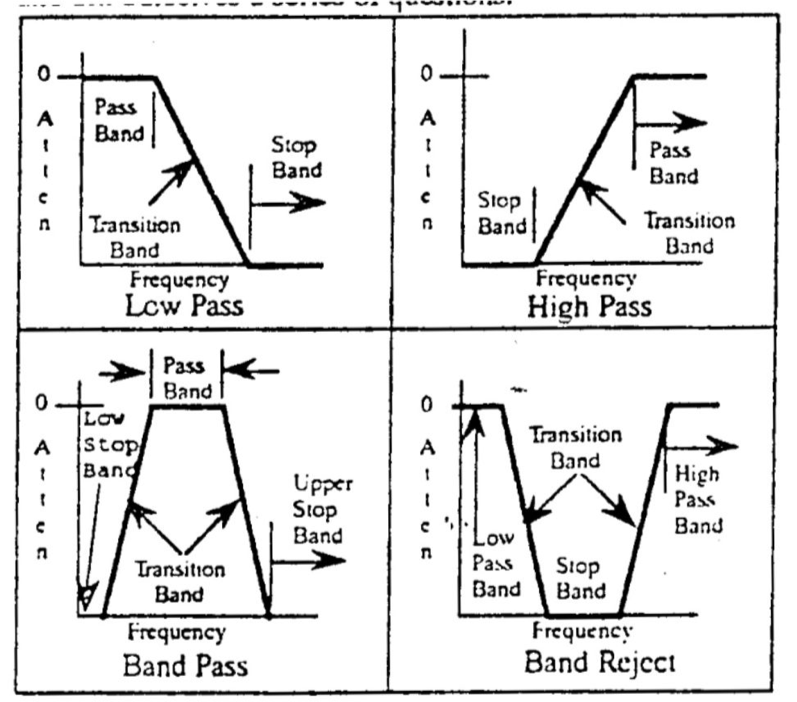

1. A **low-pass** filter passes low frequencies.

2. A **high-pass** filter passes high frequencies.

3. A **band-pass** filter passes a limited range of frequencies.

4. A **band-reject** filter passes all but a limited range of frequencies.

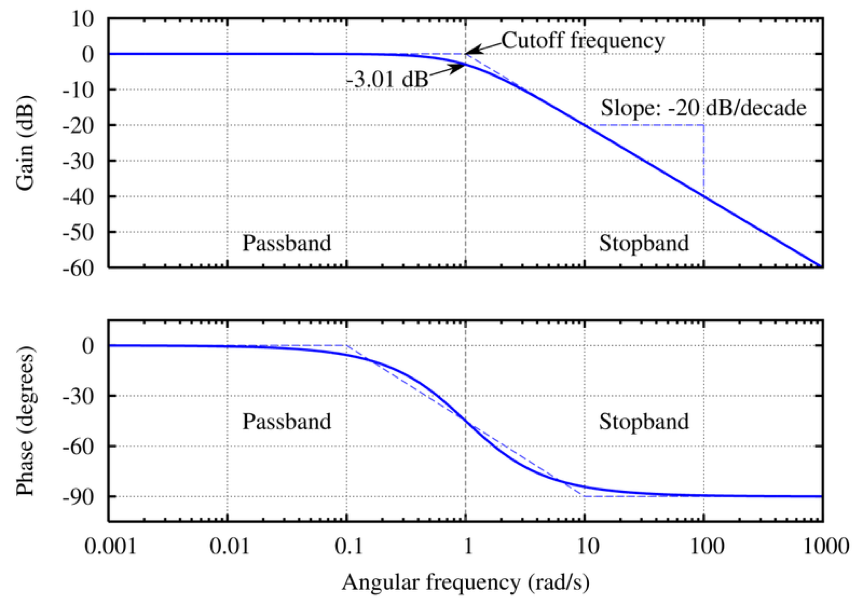

This is a Bode plot - a fundamental way to characterize filter behavior. It shows two complementary views of how a filter responds across frequencies.

**Top plot:** Magnitude/Gain response (how much amplitude is passed at each frequency)

**Bottom plot:** Phase response (how much timing delay occurs at each frequency)

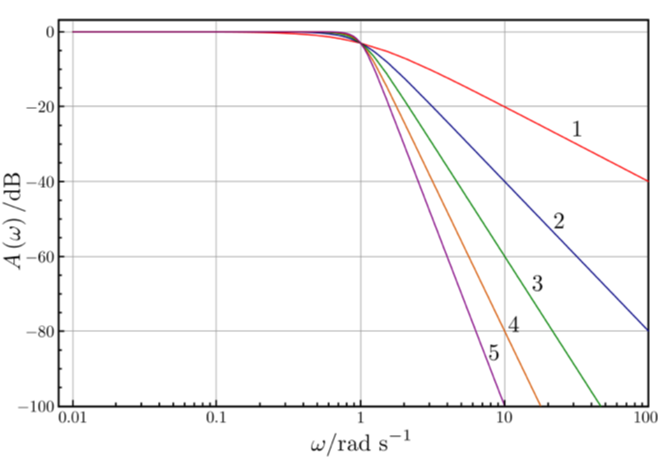

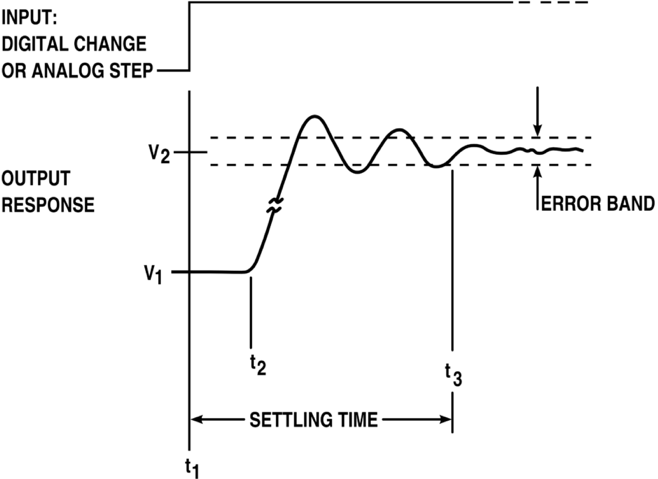

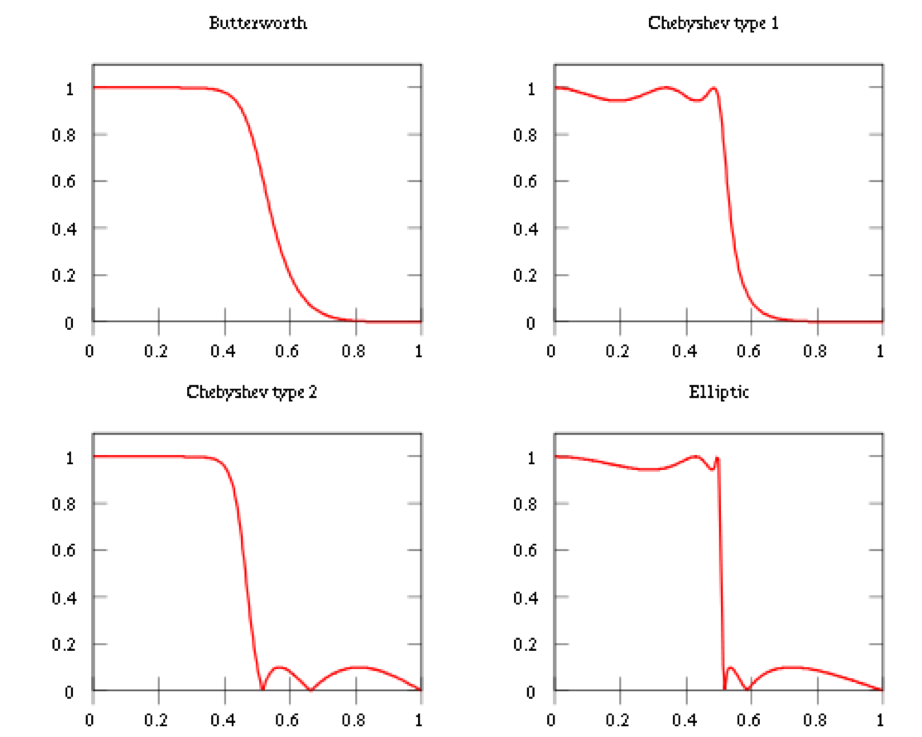

Lets try an example:

In [ ]:
#Time Domain
fig, axs = plt.subplots(3, 1)
f_s = 100
time = np.linspace(0, 1, f_s)
freq1 = 10
amplitude1 = np.sin(2*np.pi*time*freq1)
freq2 = 34
amplitude2 = np.sin(2*np.pi*time*freq2)

axs[0].plot(time,amplitude1)
axs[1].plot(time,amplitude2)
axs[2].plot(time,amplitude2+amplitude1)

axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[2].set_xlim(0,1)

plt.tight_layout()
plt.show()

In [ ]:
#Frequency Domain
from scipy import fftpack
len1 = len(amplitude1)
X = fftpack.fft(amplitude1+amplitude2)
freqs = fftpack.fftfreq(len1) * f_s
# print(freqs[0:int(len1/2)])

plt.plot(freqs[0:int(len1/2)], 2*np.abs(X)[0:int(len1/2)])
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain (Spectrum) Magnitude')
#plt.xlim(0, f_s/4)
plt.xlim(0, f_s/2)
plt.show()

In [ ]:
from scipy import signal
b, a = signal.butter(6,20/50, 'low')
y = signal.filtfilt(b, a, amplitude1+amplitude2)
plt.plot(y)

In [ ]:
#Frequency Domain
from scipy import fftpack
len1 = len(y)
X = fftpack.fft(y)
freqs = fftpack.fftfreq(len1) * f_s
# print(freqs[0:int(len1/2)])

plt.plot(freqs[0:int(len1/2)], 2*np.abs(X)[0:int(len1/2)])
plt.xlabel('Frequency in Hertz [Hz]')
plt.ylabel('Frequency Domain (Spectrum) Magnitude')
#plt.xlim(0, f_s/4)
plt.xlim(0, f_s/2)
plt.show()